In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
import statsmodels.api as sm
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\Gaurav\\Desktop\\Project 1'

In [3]:
loan_data = pd.read_csv("bank-loan.csv")

In [4]:
loan_data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
##Missing value analysis

In [6]:
missing_values = pd.DataFrame(loan_data.isnull().sum())

In [7]:
missing_values

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [8]:
##Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae20d11898>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae20d11f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae20d114a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae20d2e5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae20d2e940>],
 'means': []}

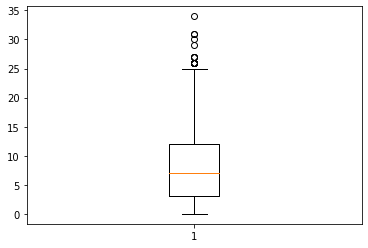

In [9]:
plt.boxplot(loan_data['address'])

In [10]:
df = loan_data.copy()

In [11]:
defaulter_vals = df['default']
defaulter_vals

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
845    NaN
846    NaN
847    NaN
848    NaN
849    NaN
Name: default, Length: 850, dtype: float64

In [12]:
ed = df['ed']
ed

0      3
1      1
2      1
3      1
4      2
      ..
845    1
846    2
847    1
848    2
849    1
Name: ed, Length: 850, dtype: int64

In [13]:
df = df.drop(['default', 'ed'], axis = 1)

In [14]:
df.shape

(850, 7)

In [15]:
df.head()

,age,employ,address,income,debtinc,creddebt,othdebt
0,41,17,12,176,9.3,11.359392,5.008608
1,27,10,6,31,17.3,1.362202,4.000798
2,40,15,14,55,5.5,0.856075,2.168925
3,41,15,14,120,2.9,2.658720,0.821280
4,24,2,0,28,17.3,1.787436,3.056564


In [16]:
cnames = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [17]:
#detecting outliers from data and replacing with nan

In [18]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    #print(q75)
    #print(q25)
    iqr = q75 - q25
    #print(iqr)
    min = q25 - (iqr*1.5)
    #print(min)
    max = q75 + (iqr*1.5)
    #print(max)
    #Replacing with NA
    df.loc[df[i] < min, :i] = np.nan
    df.loc[df[i] > max, :i] = np.nan

age
employ
address
income
debtinc
creddebt
othdebt


In [19]:
df.isnull().sum()

age         149
employ      149
address     148
income      137
debtinc     111
creddebt    103
othdebt      61
dtype: int64

In [20]:
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/850 with 6 missing, elapsed time: 0.150
Imputing row 101/850 with 4 missing, elapsed time: 0.162
Imputing row 201/850 with 0 missing, elapsed time: 0.165
Imputing row 301/850 with 7 missing, elapsed time: 0.167
Imputing row 401/850 with 0 missing, elapsed time: 0.170
Imputing row 501/850 with 0 missing, elapsed time: 0.173
Imputing row 601/850 with 0 missing, elapsed time: 0.177
Imputing row 701/850 with 0 missing, elapsed time: 0.182
Imputing row 801/850 with 0 missing, elapsed time: 0.186
[KNN] Warning: 427/5950 still missing after imputation, replacing with 0


In [21]:
df.isnull().sum()

age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

In [22]:
df = df.join(defaulter_vals)

In [23]:
df = df.join(ed)

In [24]:
cols = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']
df = df[cols]
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,31.611090,3,6.144205,8.649856,43.600581,18.500435,2.326202,5.008608,1.0
1,27.000000,1,10.000000,6.000000,31.000000,17.300000,1.362202,4.000798,0.0
2,40.000000,1,15.000000,14.000000,55.000000,5.500000,0.856075,2.168925,0.0
3,45.812528,1,17.114644,16.862865,82.601083,2.900000,2.658720,0.821280,0.0
4,24.000000,2,2.000000,0.000000,28.000000,17.300000,1.787436,3.056564,1.0


In [25]:
df.shape

(850, 9)

In [26]:
##Feature selection
#Correlation analysis
df_corr = df.loc[:,cnames]

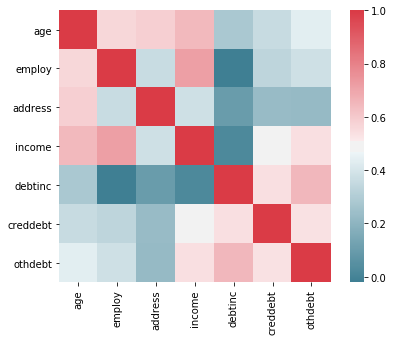

In [27]:
#width and height of plot
f, ax = plt.subplots(figsize=(7,5))
#correlation matrix
corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [28]:
##Feature Scaling

(array([117., 117., 130.,  91.,  75.,  68.,  55.,  31.,  31.,  25.,  23.,
         25.,  17.,   9.,   8.,   7.,   9.,  12.]),
 array([0.        , 0.45329356, 0.90658711, 1.35988067, 1.81317422,
        2.26646778, 2.71976133, 3.17305489, 3.62634844, 4.079642  ,
        4.53293556, 4.98622911, 5.43952267, 5.89281622, 6.34610978,
        6.79940333, 7.25269689, 7.70599044, 8.159284  ]),
 <a list of 18 Patch objects>)

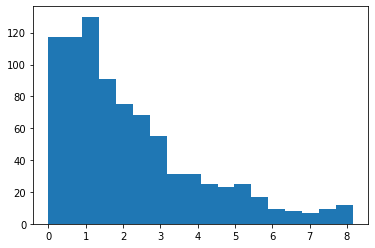

In [29]:
plt.hist(df['othdebt'], bins='auto')

In [30]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [31]:
#Standardising the values

In [32]:
for i in cnames:
    print(i)
    df[i] = (df[i] - df[i].mean())/df[i].std()

age
employ
address
income
debtinc
creddebt
othdebt


In [33]:
df.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,-0.007193,3,-0.167153,0.256605,0.332457,1.735166,1.485981,1.520232,1.0
1,-0.412814,1,0.482907,-0.182364,-0.236921,1.527230,0.421656,0.977333,0.0
2,0.730751,1,1.325872,1.142898,0.847558,-0.516729,-0.137145,-0.009483,0.0
3,1.242059,1,1.682386,1.617153,2.094758,-0.967093,1.853105,-0.735449,0.0
4,-0.676714,2,-0.865837,-1.176311,-0.372481,1.527230,0.891145,0.468681,1.0
5,0.818717,2,-0.360058,-0.348022,-0.508040,0.297391,-0.648745,-0.015746,0.0
6,-2.787912,1,-1.203023,-1.176311,-1.637706,-1.469421,-1.082314,-1.177867,0.0
7,0.994651,1,0.820093,0.645924,0.079386,-0.845841,-0.940339,-0.510207,0.0
8,-0.676714,1,-0.697244,-0.513680,-0.779160,2.757070,0.417400,0.587780,1.0
9,0.378885,1,-1.203023,0.977240,-0.508040,1.942951,1.984468,-0.021133,0.0


In [34]:
df.to_csv('loan_data_preprocessed.csv')

In [35]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [36]:
##Creating two sets of data frames to deal with missing values in 'default' 1. by replacing missing values with 0 2. by imputing missing values using KNN 

In [37]:
##Dataframe-1 / replacing nan with 0

In [38]:
loan_data_replaced = df.copy()

In [39]:
loan_data_replaced['default'] = loan_data_replaced['default'].fillna(0)

In [40]:
loan_data_replaced.head(-10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,-0.007193,3,-0.167153,0.256605,0.332457,1.735166,1.485981,1.520232,1.0
1,-0.412814,1,0.482907,-0.182364,-0.236921,1.527230,0.421656,0.977333,0.0
2,0.730751,1,1.325872,1.142898,0.847558,-0.516729,-0.137145,-0.009483,0.0
3,1.242059,1,1.682386,1.617153,2.094758,-0.967093,1.853105,-0.735449,0.0
4,-0.676714,2,-0.865837,-1.176311,-0.372481,1.527230,0.891145,0.468681,1.0
...,...,...,...,...,...,...,...,...,...
835,0.378885,1,2.000243,0.148951,0.395692,0.626503,-0.066341,1.259606,0.0
836,0.072911,2,0.903027,0.221818,2.242699,0.016694,1.894720,1.046201,0.0
837,-0.060948,2,0.820093,0.148951,0.350505,0.193460,0.978998,0.091827,0.0
838,0.232179,1,0.824845,0.336201,1.888959,-0.759232,1.390892,0.177442,0.0


In [41]:
loan_data_replaced.to_csv('loan_data_replaced.csv')

In [42]:
## Dataframe calculating default with KNN

In [43]:
loan_data_calc = df.copy()
loan_data_calc.head()
loan_data_calc.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [44]:
loan_data_calc = pd.DataFrame(KNN(k = 3).fit_transform(loan_data_calc), columns = loan_data_calc.columns)

Imputing row 1/850 with 0 missing, elapsed time: 0.170
Imputing row 101/850 with 0 missing, elapsed time: 0.171
Imputing row 201/850 with 0 missing, elapsed time: 0.172
Imputing row 301/850 with 0 missing, elapsed time: 0.173
Imputing row 401/850 with 0 missing, elapsed time: 0.173
Imputing row 501/850 with 0 missing, elapsed time: 0.174
Imputing row 601/850 with 0 missing, elapsed time: 0.175
Imputing row 701/850 with 1 missing, elapsed time: 0.176
Imputing row 801/850 with 1 missing, elapsed time: 0.180


In [45]:
loan_data_calc['default'].unique()

array([1.        , 0.        , 0.6464242 , 0.2771395 , 0.27379109,
       0.2598409 , 0.33333333, 0.45454061, 0.33467568, 0.343717  ,
       0.7425724 , 0.42112028, 0.37780106, 0.71975498, 0.38105233,
       0.59566579, 0.1705145 , 0.27623178, 0.31368483, 0.29519926,
       0.99999998, 0.33897186, 0.71664524, 0.60166616, 0.53159933,
       0.46619754, 0.39848608, 0.99999995, 0.3212941 , 0.46902952,
       0.26207588, 0.32936981, 0.62866171, 0.62718433, 0.73402621,
       0.35947993, 0.99999997, 0.67383434, 0.32384438, 0.52860446,
       0.33274534, 0.83162327, 0.78799689, 0.21318789, 0.01122351,
       0.43271099, 0.37266354, 0.2369099 , 0.99999998, 0.29749379,
       0.19433237, 0.67043477, 0.66395863, 0.66666667, 0.57243092,
       0.99999992, 0.34945536, 0.75239517, 0.30265938, 0.5053947 ,
       0.99999997, 0.29743421, 0.33594081, 0.44906808])

In [46]:
loan_data_calc = loan_data_calc.round({'default': 0})
loan_data_calc['default'].value_counts()

0.0    640
1.0    210
Name: default, dtype: int64

In [47]:
loan_data_calc.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,-0.007193,3.0,-0.167153,0.256605,0.332457,1.735166,1.485981,1.520232,1.0
1,-0.412814,1.0,0.482907,-0.182364,-0.236921,1.527230,0.421656,0.977333,0.0
2,0.730751,1.0,1.325872,1.142898,0.847558,-0.516729,-0.137145,-0.009483,0.0
3,1.242059,1.0,1.682386,1.617153,2.094758,-0.967093,1.853105,-0.735449,0.0
4,-0.676714,2.0,-0.865837,-1.176311,-0.372481,1.527230,0.891145,0.468681,1.0


In [48]:
loan_data_calc.to_csv('loan_data_calc.csv')

In [49]:
#Model Devolpment

In [50]:
##Logistic Regression
##Saving target variable

In [51]:
loan_data_logit = pd.DataFrame(loan_data_calc['default'])

In [52]:
#Adding continuous varaibles
loan_data_logit = loan_data_logit.join(loan_data_calc[cnames])

In [53]:
loan_data_logit.shape

(850, 8)

In [54]:
#creating dummies for categorical varaiable 'ed'
temp = pd.get_dummies(loan_data_calc['ed'],prefix='ed')
loan_data_logit = loan_data_logit.join(temp)

In [55]:
sample_index = np.random.rand(len(loan_data_logit)) < 0.8

train = loan_data_logit[sample_index]
test = loan_data_logit[~sample_index]

In [56]:
train.shape

(678, 13)

In [57]:
train_cols = train.columns[1:]
train_cols

Index(['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt',
       'ed_1.0', 'ed_2.0', 'ed_3.0', 'ed_4.0', 'ed_5.0'],
      dtype='object')

In [58]:
logit = sm.Logit(train['default'],train[train_cols]).fit()

         Current function value: 0.441843
         Iterations: 35


C:\Users\Gaurav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [59]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  678
Model:                          Logit   Df Residuals:                      666
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Mar 2020   Pseudo R-squ.:                  0.2176
Time:                        01:41:30   Log-Likelihood:                -299.57
converged:                      False   LL-Null:                       -382.90
Covariance Type:            nonrobust   LLR p-value:                 5.725e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2724      0.176      1.544      0.123      -0.073       0.618
employ        -1.0349      0.200     -5.185      0.000      -1.426      -0.644
address       -0.5278      0.151     -3.498      0.000      -0.823      -0.232
income        -0.8528      0.307     -2.775      0.006      -1.455      -0.251
debtinc       -0.0700      0.202     -0.346      0.729      -0.466       0.326
creddebt       0.8235      0.169      4.874      0.000       0.492       1.155
othdebt        0.6581      0.218      3.017      0.003       0.231       1.086
ed_1.0        -1.7545      0.168    -10.453      0.000      -2.084      -1.426
ed_2.0        -1.5235      0.210     -7.253      0.000      -1.935      -1.112
ed_3.0        -1.3414      0.305     -4.394      0.000      -1.940      -0.743
ed_4.0        -0.9866      0.430     -2.297      0.022      -1.829      -0.145
ed_5.0       -22.4720   4.01e+04     -0.001      1.000   -7.86e+04    7.85e+04
==============================================================================
"""

In [60]:
#Predecting test data
test['Actual_prob'] = logit.predict(test[train_cols])
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gaurav\Anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [61]:
test.head()

,default,age,employ,address,income,debtinc,creddebt,othdebt,ed_1.0,ed_2.0,ed_3.0,ed_4.0,ed_5.0,Actual_prob,ActualVal
2,0.0,0.730751,1.325872,1.142898,0.847558,-0.516729,-0.137145,-0.009483,1,0,0,0,0,0.012912,0
14,0.0,1.434483,2.506022,1.308555,2.880956,0.106852,3.006839,1.729079,1,0,0,0,0,0.029362,0
21,0.0,1.346517,1.663058,2.302502,0.305319,-0.499407,-0.433614,-0.197205,1,0,0,0,0,0.006456,0
25,0.0,-0.588748,-1.203023,-0.844995,-0.191734,1.579195,1.280578,0.703161,0,0,0,1,0,0.892286,1
39,0.0,1.170584,2.674615,-0.348022,0.621625,-0.741911,-0.465579,-0.347526,1,0,0,0,0,0.005998,0


In [62]:
#Building confusion matrix
CM = pd.crosstab(test['default'],test['ActualVal'])

TN = CM.iloc[0,0]
FN = CM.iloc[0,1]
TP = CM.iloc[1,0]
FP = CM.iloc[1,1]


In [63]:
#Accuracy and false negative rate
Accuracy_logit = ((TP+TN)*100)/(TN+TP+FN+FP)
FNR_logit = (FN*100)/(FN+TP)


In [64]:
Accuracy_logit

89.53488372093024

In [65]:
FNR_logit

23.076923076923077

In [66]:
##Decision Tree

In [67]:
X = loan_data_calc.values[:,0:8]
Y = loan_data_calc.values[:,8]

In [68]:
##Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [69]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [70]:
C50_predictions = C50_model.predict(x_test)

In [71]:
#Building confusion matrix
CM = pd.crosstab(y_test,C50_predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[0,1]
TP = CM.iloc[1,0]
FP = CM.iloc[1,1]

In [72]:
#Accuracy and false negative rate
Accuracy_tree = ((TP+TN)*100)/(TN+TP+FN+FP)
FNR_tree = (FN*100)/(FN+TP)


In [73]:
Accuracy_tree

74.70588235294117

In [74]:
FNR_tree

56.81818181818182

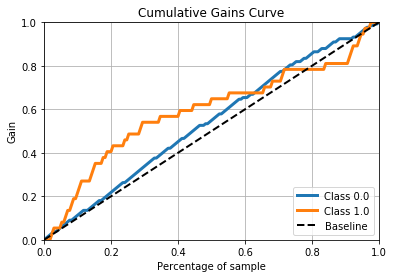

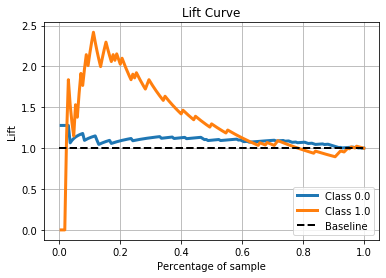

In [75]:
skplt.metrics.plot_cumulative_gain(y_test, C50_model.predict_proba(x_test))
skplt.metrics.plot_lift_curve(y_test, C50_model.predict_proba(x_test))
plt.show()

In [76]:
#Random Forest

In [77]:
RF_model = RandomForestClassifier(n_estimators=20).fit(x_train,y_train)

In [78]:
RF_predictions = RF_model.predict(x_test)

In [79]:
#Building confusion matrix
CM = pd.crosstab(y_test,RF_predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[0,1]
TP = CM.iloc[1,0]
FP = CM.iloc[1,1]

In [80]:
#Accuracy and false negative rate
Accuracy_forest = ((TP+TN)*100)/(TN+TP+FN+FP)
FNR_forest = (FN*100)/(FN+TP)

In [81]:
Accuracy_forest

82.94117647058823

In [82]:
FNR_forest

39.473684210526315

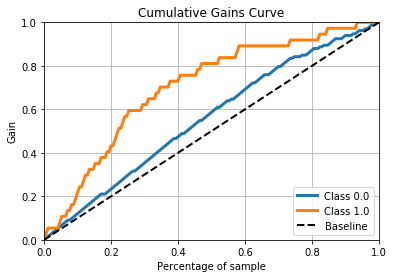

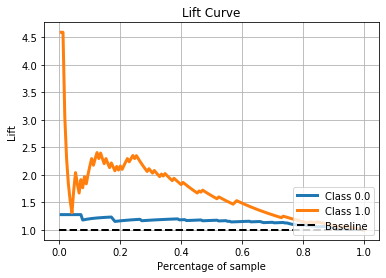

In [83]:
skplt.metrics.plot_cumulative_gain(y_test, RF_model.predict_proba(x_test))
skplt.metrics.plot_lift_curve(y_test, RF_model.predict_proba(x_test))
plt.show()

In [84]:
##KNN 

In [85]:
KNN_model = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)

In [86]:
KNN_predictions = KNN_model.predict(x_test)

In [87]:
#Building confusion matrix
CM = pd.crosstab(y_test,KNN_predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[0,1]
TP = CM.iloc[1,0]
FP = CM.iloc[1,1]

In [88]:
#Accuracy and false negative rate
Accuracy_KNN = ((TP+TN)*100)/(TN+TP+FN+FP)
FNR_KNN = (FN*100)/(FN+TP)


In [89]:
Accuracy_KNN

89.41176470588235

In [90]:
FNR_KNN

21.21212121212121

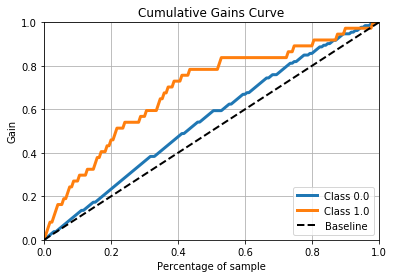

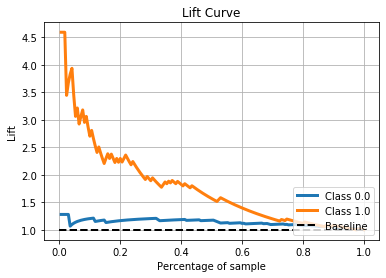

In [91]:
skplt.metrics.plot_cumulative_gain(y_test, KNN_model.predict_proba(x_test))
skplt.metrics.plot_lift_curve(y_test, KNN_model.predict_proba(x_test))
plt.show()

In [92]:
#Naive Bayes

NB_model = GaussianNB().fit(x_train,y_train)

In [93]:
NB_predictions = NB_model.predict(x_test)

In [94]:
#Building confusion matrix
CM = pd.crosstab(y_test,NB_predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[0,1]
TP = CM.iloc[1,0]
FP = CM.iloc[1,1]

In [95]:
#Accuracy and false negative rate
Accuracy_NB = ((TP+TN)*100)/(TN+TP+FN+FP)
FNR_NB = (FN*100)/(FN+TP)


In [96]:
Accuracy_NB

72.3529411764706

In [97]:
FNR_NB

62.5

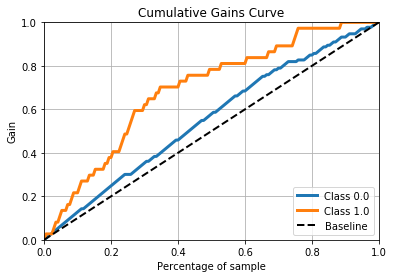

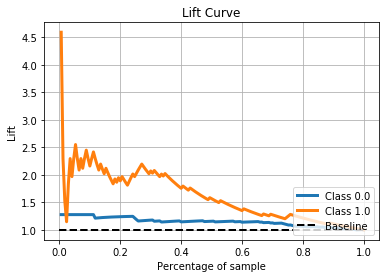

In [98]:
skplt.metrics.plot_cumulative_gain(y_test, NB_model.predict_proba(x_test))
skplt.metrics.plot_lift_curve(y_test, NB_model.predict_proba(x_test))
plt.show()